In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
full_df = pd.read_csv("../agaricus-lepiota.data")
df = full_df.drop(columns=["edibility"]) # Drop edibility from data frame.
df.describe()

,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,4,9,9,1,4,3,5,9,6,7
top,x,y,n,f,n,f,c,b,b,t,...,s,w,w,p,w,o,p,w,v,d
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [3]:
# Introduce dummy variables.
dummy_df = pd.get_dummies(df)

min_k, max_k = 2, 15
ks = np.arange(min_k, max_k + 1)
silhouettes = np.zeros((max_k - min_k) + 1)

for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(dummy_df)
    silhouettes[k - min_k] = silhouette_score(dummy_df, kmeans.labels_)
    print(f"k = {k} gave sc = {silhouettes[k - min_k]:.3f}")

max_index = silhouettes.argmax()
print(f"k = {ks[max_index]} provides the best sc = {silhouettes[max_index]}.3f.")

k = 2 gave sc = 0.162
k = 3 gave sc = 0.216
k = 4 gave sc = 0.225
k = 5 gave sc = 0.254
k = 6 gave sc = 0.268
k = 7 gave sc = 0.274
k = 8 gave sc = 0.282
k = 9 gave sc = 0.292
k = 10 gave sc = 0.235
k = 11 gave sc = 0.182
k = 12 gave sc = 0.197
k = 13 gave sc = 0.205
k = 14 gave sc = 0.210
k = 15 gave sc = 0.156
k = 9 provides the best sc = 0.2916438615238014.3f.


Text(0, 0.5, 'Silhouette Coefficient (sc)')

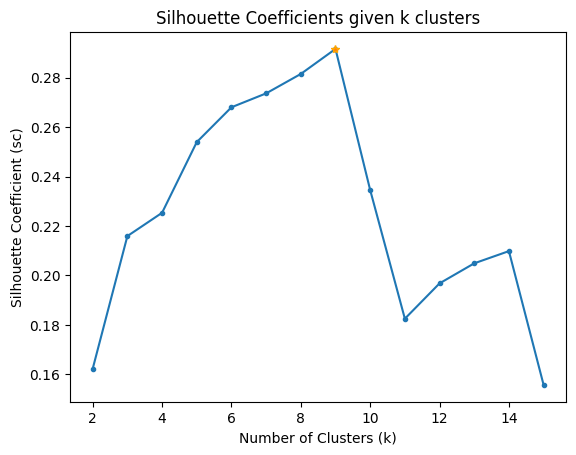

In [4]:
plt.figure()
plt.plot(ks, silhouettes, marker=".")
plt.plot(ks[max_index], silhouettes[max_index], marker="*", markeredgecolor="orange")
plt.title("Silhouette Coefficients given k clusters")
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Coefficient (sc)')

In [6]:
# Project the dataset in 3D by reducing dimentions.
k = ks[max_index]
pca = PCA(n_components=3) # Use PCA with 3 dimentions.
points = np.array(pca.fit_transform(dummy_df)) # Transform the data into points in 3D space.
labels = KMeans(n_clusters=k).fit_predict(dummy_df) # Generate labels/colors based on the best k.

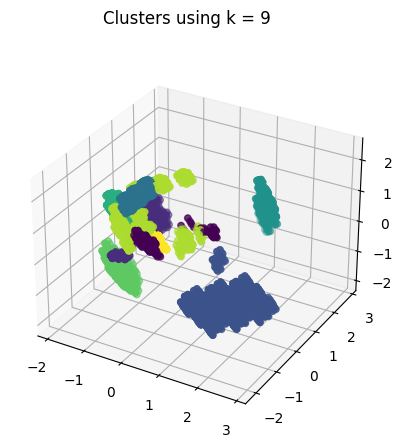

In [7]:
fig = plt.figure()
fig.suptitle(f"Clusters using k = {k}")
ax = fig.add_subplot(111, projection="3d")
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=labels, s=20)
